# Project Description

This is a practice project where I will demonstrate my ETL and data manipulation skills. This project is part of another fuller-version project that I have worked on with recommender system (see project demonstration [here](https://github.com/shuliuliu/projectdemonstration/blob/master/6_Recommender_System_Practice%20-%20Recommending_Movies.ipynb)). The data source I use provided two sets of data:

* The Full Dataset: Consists of 26,000,000 ratings and 750,000 tag applications applied to 45,000 movies by 270,000 users. Includes tag genome data with 12 million relevance scores across 1,100 tags.
* The Small Dataset: Comprises of 100,000 ratings and 1,300 tag applications applied to 9,000 movies by 700 users.

I will be using the full dataset as it's more realistic mimic of the data size data engineers/analysts normally deal with in real life, and can better demonstrate my ETL skill.

# Project Pipeline

1. Import data and save to data frame using Pandas
2. Pick meaningful columns and exam the data
3. ETL to-do list:
    * Handle missing values
    * Handle data types
    * Handle data format (e.g., decimals for float data, convert dollar amounts to millions, etc)
    * Decrypt meaningful values from certain columns
    * Adjust columns names for better understanding
    * Handle abnormal values
    * Downcast the dataframe to save memory
4. The end

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
sns.set_style('white')

In [3]:
movie_info = pd.read_csv('../input/the-movies-dataset/movies_metadata.csv',header=0,low_memory=False)
# get rid of abnormal 'id' values in movie_info and convert 'id' to 'int' type
# this step needs to be done first so the data from various table can be merged based on field "id"
movie_info = movie_info.drop([19730, 29503, 35587])

movie_info.loc[movie_info['id'].str.contains(r'\D')==True]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [4]:
movie_info.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
credits = pd.read_csv('../input/the-movies-dataset/credits.csv')
keywords = pd.read_csv('../input/the-movies-dataset/keywords.csv')

# convert data type of "id" columns in all three tables so they can be merged
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movie_info['id'] = movie_info['id'].astype('int')

In [6]:
movie_info = movie_info.merge(credits, on='id')
movie_info = movie_info.merge(keywords, on='id')

movie_info.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [7]:
columns = ['id','budget','revenue','popularity','release_date','runtime','production_companies','genres','title','cast','crew','keywords']
movie_info = movie_info[columns]

movie_info.head()

,id,budget,revenue,popularity,release_date,runtime,production_companies,genres,title,cast,crew,keywords
0,862,30000000,373554033.0,21.946943,1995-10-30,81.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,65000000,262797249.0,17.015539,1995-12-15,104.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,0,0.0,11.7129,1995-12-22,101.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,16000000,81452156.0,3.859495,1995-12-22,127.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,0,76578911.0,8.387519,1995-02-10,106.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46628 non-null  int64  
 1   budget                46628 non-null  object 
 2   revenue               46624 non-null  float64
 3   popularity            46624 non-null  object 
 4   release_date          46540 non-null  object 
 5   runtime               46360 non-null  float64
 6   production_companies  46624 non-null  object 
 7   genres                46628 non-null  object 
 8   title                 46624 non-null  object 
 9   cast                  46628 non-null  object 
 10  crew                  46628 non-null  object 
 11  keywords              46628 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.6+ MB


**ETL TODO #1: Handle missing values**

In [9]:
movie_info.dropna(inplace=True)
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46287 entries, 0 to 46627
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46287 non-null  int64  
 1   budget                46287 non-null  object 
 2   revenue               46287 non-null  float64
 3   popularity            46287 non-null  object 
 4   release_date          46287 non-null  object 
 5   runtime               46287 non-null  float64
 6   production_companies  46287 non-null  object 
 7   genres                46287 non-null  object 
 8   title                 46287 non-null  object 
 9   cast                  46287 non-null  object 
 10  crew                  46287 non-null  object 
 11  keywords              46287 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.6+ MB


**ETL TODO #2: Handle data types**

First, I will check if there is any numeric columns contain a non-numeric value. Supposedly numeric features should include "id", "budget", "popularity", "revenue". Column "revenue" is already float64, so I will just check the other two columns.

In [10]:
movie_info.loc[movie_info['budget'].str.contains(r'\D')==True]

,id,budget,revenue,popularity,release_date,runtime,production_companies,genres,title,cast,crew,keywords


In [11]:
movie_info.loc[movie_info['popularity'].str.contains(r'\d')==True]

,id,budget,revenue,popularity,release_date,runtime,production_companies,genres,title,cast,crew,keywords
0,862,30000000,373554033.0,21.946943,1995-10-30,81.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,65000000,262797249.0,17.015539,1995-12-15,104.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,0,0.0,11.7129,1995-12-22,101.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,16000000,81452156.0,3.859495,1995-12-22,127.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,0,76578911.0,8.387519,1995-02-10,106.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...
46622,30840,0,0.0,5.683753,1991-05-13,104.0,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",Robin Hood,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",[]
46624,111109,0,0.0,0.178241,2011-11-17,360.0,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'id': 18, 'name': 'Drama'}]",Century of Birthing,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46625,67758,0,0.0,0.903007,2003-08-01,90.0,"[{'name': 'American World Pictures', 'id': 6165}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Betrayal,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",[]
46626,227506,0,0.0,0.003503,1917-10-21,87.0,"[{'name': 'Yermoliev', 'id': 88753}]",[],Satan Triumphant,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",[]


Column "id" and "budget" contain no non-numeric values, and all values in column "popularity" seem to have been stored as non-digits.

In [12]:
movie_info['budget'] = pd.to_numeric(movie_info['budget'])
movie_info['popularity'] = movie_info['popularity'].astype('float')

I noticed that there are many data rows with 0 budget and 0 revenue, and empty value for "production_companies", those look abnormal and I will deal with them later.

Next I will look at the string type columns. First I will look at column "title".

In [13]:
movie_info['title'] = movie_info['title'].apply(str)
movie_info.title.dtype

dtype('O')

Supposedly column "title" should be a string type. After I ran a closer look per below, there are some rows with only numeric-like values in column "title", which can be the case. I will just leave it as is.

In [14]:
movie_info.loc[movie_info['title'].apply(lambda x: True if x.isdigit() else False) == True]

,id,budget,revenue,popularity,release_date,runtime,production_companies,genres,title,cast,crew,keywords
2099,3682,13000000,16757163.0,8.736869,1998-08-28,106.0,"[{'name': 'Redeemable Features', 'id': 1483}, ...","[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",54,"[{'cast_id': 2, 'character': ""Shane O'Shea"", '...","[{'credit_id': '561fa61592514171cb003460', 'de...","[{'id': 242, 'name': 'new york'}, {'id': 572, ..."
2218,4437,28000000,40400657.0,7.482865,1984-12-06,116.0,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",2010,"[{'cast_id': 10, 'character': 'Dr. Heywood Flo...","[{'credit_id': '52fe43c1c3a36847f806d331', 'de...","[{'id': 306, 'name': 'jupiter'}, {'id': 3222, ..."
4369,47817,0,5979011.0,2.238458,1988-08-18,95.0,"[{'name': 'Atlantic Entertainment Group', 'id'...","[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",1969,"[{'cast_id': 3, 'character': 'Ralph Carr', 'cr...","[{'credit_id': '52fe4748c3a36847f812cf39', 'de...","[{'id': 2956, 'name': 'vietnam'}, {'id': 6091,..."
5386,14902,0,0.0,1.558517,1972-11-09,142.0,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1776,"[{'cast_id': 2, 'character': 'John Adams', 'cr...","[{'credit_id': '55881772c3a368273500771f', 'de...","[{'id': 279, 'name': 'usa'}, {'id': 1705, 'nam..."
6578,9051,0,74865517.0,8.539083,1979-10-04,122.0,"[{'name': 'Orion Pictures Corporation', 'id': ...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",10,"[{'cast_id': 1, 'character': 'George Webber', ...","[{'credit_id': '52fe44d6c3a36847f80acf17', 'de...","[{'id': 293, 'name': 'female nudity'}, {'id': ..."
7021,11519,35000000,31755742.0,7.812379,1979-12-13,113.0,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",1941,"[{'cast_id': 7, 'character': 'Sgt. Frank Tree'...","[{'credit_id': '52fe44509251416c750306d9', 'de...","[{'id': 339, 'name': 'submarine'}, {'id': 387,..."
8836,3870,9000000,0.0,6.317822,1976-09-03,317.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1900,"[{'cast_id': 2, 'character': 'Alfredo Berlingh...","[{'credit_id': '52fe43a5c3a36847f80648e7', 'de...","[{'id': 131, 'name': 'italy'}, {'id': 1755, 'n..."
9293,844,12000000,19271312.0,7.157169,2004-05-20,129.0,"[{'name': 'Paradis Films', 'id': 255}, {'name'...","[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",2046,"[{'cast_id': 5, 'character': 'Chow Mo-Wan', 'c...","[{'credit_id': '52fe4281c3a36847f8023fe1', 'de...","[{'id': 460, 'name': 'free love'}, {'id': 612,..."
10491,31227,0,0.0,0.785054,2005-01-28,126.0,"[{'name': 'Coproduction Office', 'id': 6505}, ...","[{'id': 18, 'name': 'Drama'}]",4,"[{'cast_id': 3, 'character': 'Oleg', 'credit_i...","[{'credit_id': '52fe446b9251416c9101003f', 'de...","[{'id': 10183, 'name': 'independent film'}]"
11043,1557,0,0.0,8.271531,1998-07-02,99.0,[{'name': 'Claussen + Wöbke Filmproduktion Gmb...,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",23,"[{'cast_id': 3, 'character': 'David', 'credit_...","[{'credit_id': '52fe42fdc3a36847f80322b9', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 1772, 'nam..."


**ETL TODO #3: Handle data format**

First I will round column "popularity" to 1 decimals as further decimal isn't as meaningful.

In [15]:
movie_info['popularity'] = movie_info['popularity'].round(1)

Next I will convert revenue and budget from dollar amount format to millions.

In [16]:
movie_info['revenue'] = movie_info['revenue'].div(1000000)
movie_info['budget'] = movie_info['budget'].div(1000000)

Next I will deal with column "release_date". I will convert the format to datetime, and then add a new column for "release_year".

In [17]:
movie_info['release_year'] = movie_info['release_date'].apply(lambda x: str(x)[:4])
movie_info['release_year'] = pd.to_numeric(movie_info['release_year'])

movie_info['release_date'] = pd.to_datetime(movie_info['release_date'], format='%Y-%m-%d')

**ETL TODO #4: Decrypt meaningful values from certain columns**

First I will take a look at the production_companies column. Check how many unique values are displayed in this column:

In [18]:
movie_info.production_companies.value_counts(ascending=False)

[]                                                                                                                                                                                                                                                                                                       12040
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                                                                                                                                                        746
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                                                                     543
[{'name': 'Paramount Pictures', 'id': 4}]                                                  

From the above, there are 22637 unique values in total for column "production_companies", of which 11641 rows with '[]' as vales in this column. What I will do is tag those '[]' as 'NoValue_', highlight the 10 most productive companies, and tag the rest as 'Other'. Also, for movies with more than 1 production companies, I will only take the first one assuming the first listed company is the primary production company.

In [19]:
# Parse the features into a usable structure
# Here I will apply literal_eval to all the "stringified" fields at once

from ast import literal_eval

features = ['cast','crew','keywords','genres','production_companies']
for feat in features:
    movie_info[feat] = movie_info[feat].apply(literal_eval)

In [20]:
def get_prod_company(x):
    if isinstance(x,list):
        name = [i['name'] for i in x]
        # Check if more than 1 production company exist for a movie. If yes, return only the first production company assuming the first listed is the primary one
        if len(name) > 1:
            name = name[:1]
        return name
    return []

movie_info['production_companies'] = movie_info['production_companies'].apply(get_prod_company)
movie_info['production_companies'] = movie_info['production_companies'].apply(lambda x: ''.join(x))
movie_info['production_companies'] = movie_info['production_companies'].apply(lambda x: 'NoValue_' if x=='' else x)

In [21]:
movie_info.production_companies.value_counts(ascending=False).iloc[:11]

NoValue_                                  12040
Paramount Pictures                         1019
Metro-Goldwyn-Mayer (MGM)                   862
Twentieth Century Fox Film Corporation      784
Warner Bros.                                761
Universal Pictures                          760
Columbia Pictures                           432
Columbia Pictures Corporation               404
RKO Radio Pictures                          292
United Artists                              274
Walt Disney Pictures                        267
Name: production_companies, dtype: int64

In [22]:
#10 most productive companies
companies = ['Paramount Pictures', 
              'Metro-Goldwyn-Mayer (MGM)', 
              'Twentieth Century Fox Film Corporation', 
              'Warner Bros.',
              'Universal Pictures',
              'Columbia Pictures Corporation',
              'Columbia Pictures',
              'RKO Radio Pictures',
              'United Artists',
              'Walt Disney Pictures',
              'NoValue_']

movie_info['production_companies'] = movie_info['production_companies'].apply(lambda x: 'Other' if x not in companies else x)

In [23]:
movie_info.production_companies.value_counts(ascending=False)

Other                                     28392
NoValue_                                  12040
Paramount Pictures                         1019
Metro-Goldwyn-Mayer (MGM)                   862
Twentieth Century Fox Film Corporation      784
Warner Bros.                                761
Universal Pictures                          760
Columbia Pictures                           432
Columbia Pictures Corporation               404
RKO Radio Pictures                          292
United Artists                              274
Walt Disney Pictures                        267
Name: production_companies, dtype: int64

Next I will apply the similar processing on column "crew", "cast", "keywords" and "genres".
* Crew: From the crew, I will only pick the director as feature since the others don't contribute that much to the feel of the movie.
* Cast: As lesser known actors and minor roles do not really affect people's opinion of a movie, I will only select the major characters and their respective actors. I will assume the top 3 actors that appear in the credits list are the major actors.
* Keywords: I will assume the top 3 keywords that appear in the keywords fields are the most important keywords that describe a movie.
* Genres: Similar to Keywords, the top 3 Genres will define the movie.

In [24]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x): 
    for i in x:
        if i['job']=='Director':
            return i['name']
    return np.nan

movie_info['director'] = movie_info['crew'].apply(get_director)

# once column "director" is generated, I will drop column "crew"
movie_info.drop(columns=['crew'], inplace=True)

In [25]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x): 
    if isinstance(x,list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3: 
            names = names[:3]
        return names
    #Return empty list in case of missing/malformed data
    return [] 

features = ['cast','keywords','genres']
for feat in features:
    movie_info[feat] = movie_info[feat].apply(get_list)

The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that the data model doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [26]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x): 
    if isinstance(x,list):
        return [str.lower(i.replace(' ','')) for i in x]
    #Check if director exists. If not, return empty string
    else: 
        if isinstance(x,str):
            return str.lower(x.replace(' ',''))
        else:
            return ''
        
features = ['cast', 'director', 'keywords', 'genres']
for feat in features:
    movie_info[feat] = movie_info[feat].apply(clean_data)

for feat in ['cast', 'keywords', 'genres']:
    movie_info[feat] = movie_info[feat].apply(lambda x: ' '.join(x))

**ETL TODO #5: Adjust column names for better understanding**

In [27]:
movie_info.rename(columns={'id':'movieId'}, inplace=True)
movie_info.rename(columns={'revenue':'revenue (mln)'}, inplace=True)
movie_info.rename(columns={'budget':'budget (mln)'}, inplace=True)

**ETL TODO #6: Handle abnormal values**

Back to the 0 budget, 0 revenue movies I mentioned earlier, after a closer exam, those look to be legit movies, so maybe the 0 values are simply due to original data not available or not entered in the database. For now I will leave it to be.

**ETL TODO #7: Downcast the dataframe**

The purpose of downcasting is to reduce the amount of storage used by the dataframes thus to expidite the operation performance.

In [28]:
movie_info_bd = np.round(movie_info.memory_usage().sum()/(1024*1024),1)

In [29]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]],format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('str')
    return df

In [30]:
movie_info = downcast(movie_info)
movie_info_ad = np.round(movie_info.memory_usage().sum()/(1024*1024),1)

Text(0.5, 1.0, 'Effect of Downcasting')

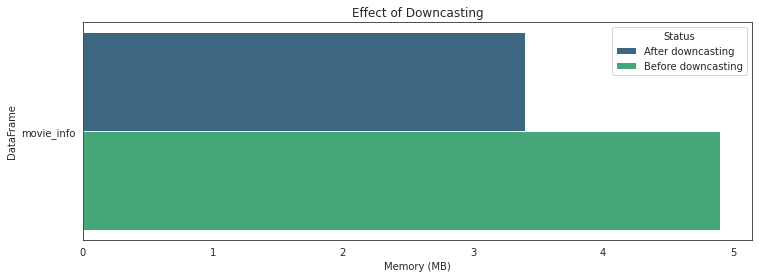

In [31]:
dic = {'DataFrame':['movie_info'],
       'Before downcasting':[movie_info_bd],
       'After downcasting':[movie_info_ad]}

memory = pd.DataFrame(dic)
memory = pd.melt(memory, id_vars='DataFrame', var_name='Status', value_name='Memory (MB)')
memory.sort_values('Memory (MB)',inplace=True)
plt.figure(figsize=(12,4))
sns.barplot(y='DataFrame',x='Memory (MB)',data=memory,hue='Status',palette='viridis').set_title('Effect of Downcasting')

# The End






In [32]:
movie_info.head()

,movieId,budget (mln),revenue (mln),popularity,release_date,runtime,production_companies,genres,title,cast,keywords,release_year,director
0,862,30.0,373.5000,21.906250,1995-10-30,81.0,Other,animation comedy family,Toy Story,tomhanks timallen donrickles,jealousy toy boy,1995,johnlasseter
1,8844,65.0,262.7500,17.000000,1995-12-15,104.0,Other,adventure fantasy family,Jumanji,robinwilliams jonathanhyde kirstendunst,boardgame disappearance basedonchildren'sbook,1995,joejohnston
2,15602,0.0,0.0000,11.703125,1995-12-22,101.0,Warner Bros.,romance comedy,Grumpier Old Men,waltermatthau jacklemmon ann-margret,fishing bestfriend duringcreditsstinger,1995,howarddeutch
3,31357,16.0,81.4375,3.900391,1995-12-22,127.0,Twentieth Century Fox Film Corporation,comedy drama romance,Waiting to Exhale,whitneyhouston angelabassett lorettadevine,basedonnovel interracialrelationship singlemother,1995,forestwhitaker
4,11862,0.0,76.5625,8.398438,1995-02-10,106.0,Other,comedy,Father of the Bride Part II,stevemartin dianekeaton martinshort,baby midlifecrisis confidence,1995,charlesshyer


In [33]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46287 entries, 0 to 46627
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movieId               46287 non-null  int32         
 1   budget (mln)          46287 non-null  float16       
 2   revenue (mln)         46287 non-null  float16       
 3   popularity            46287 non-null  float16       
 4   release_date          46287 non-null  datetime64[ns]
 5   runtime               46287 non-null  float16       
 6   production_companies  46287 non-null  object        
 7   genres                46287 non-null  object        
 8   title                 46287 non-null  object        
 9   cast                  46287 non-null  object        
 10  keywords              46287 non-null  object        
 11  release_year          46287 non-null  int16         
 12  director              46287 non-null  object        
dtypes: datetime64[ns

Basically the above is all I wanted to do with the data in terms of ETL process. Now missing values and abnormal values are cleared, data are in good format, "stringified" fields are evaluated and converted to usable formats, and the dataframe is downsized as much as possible to save memory. The next step is to decide what recommender system model will be used, whether it's correlation matrix, content-based or collaborative filtering, etc. There are 5 different methods examed in another relevant project, and more details can be found [here](https://github.com/shuliuliu/projectdemonstration/blob/master/6_Recommender_System_Practice%20-%20Recommending_Movies.ipynb).